In [ ]:
import torch
print(torch.__version__)
print(torch.version.cuda)
! pip install pyg-lib torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.13.1+cu116.html
! pip install torch-geometric
! pip install torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-1.13.1+cu116.html
! pip install scanpy
! pip install dcor
! pip install datashader
! pip install bokeh
! pip install desc
import scanpy as sc
import scipy
import pandas as pd
import numpy as np
from scipy import sparse
import umap
import datashader as ds
import pandas as pd
import holoviews as hv
import umap.plot
import desc as desc
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
! git clone https://github.com/snap-stanford/GEARS.git

In [ ]:
from GEARS.gears import PertData, GEARS

In [ ]:
adata = sc.read_h5ad('/content/GEARS/K562_ESSENTIAL.h5ad')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
adata._inplace_subset_obs(adata.obs.groupby('gene').head(45).index)
new_obs = adata.obs.groupby('gene').head(45)
new_var = adata.var

import anndata as ad
adata_ESSENTIAL = ad.AnnData(X=adata.X, obs=new_obs, var=new_var)

In [ ]:
adata_ESSENTIAL.var.drop(columns=['chr', 'start', 'end', 'class', 'strand', 'length', 'in_matrix', 'mean', 'std', 'cv', 'fano'], inplace=True)
adata_ESSENTIAL.obs['cell_type'] = 'K562'
adata_ESSENTIAL.obs.rename(columns={'sgID_AB': 'condition'}, inplace=True)
adata_ESSENTIAL.obs['condition'] = np.where(adata_ESSENTIAL.obs.gene == 'non-targeting','ctrl', adata_ESSENTIAL.obs.condition)
adata_ESSENTIAL.obs.drop(columns=['gem_group', 'gene', 'gene_id', 'transcript', 'gene_transcript', 'mitopercent', 'UMI_count', 'z_gemgroup_UMI', 'core_scale_factor', 'core_adjusted_UMI_count'], inplace=True)

In [ ]:
adata_ESSENTIAL.obs.loc[adata_ESSENTIAL.obs['condition'] != 'ctrl', 'condition'] = adata_ESSENTIAL.obs.loc[adata_ESSENTIAL.obs['condition'] != 'ctrl', 'condition'].apply(lambda x: x.split('_')[0])

In [ ]:
adata_ESSENTIAL.obs.loc[adata_ESSENTIAL.obs['condition'] != 'ctrl', 'condition'] = adata_ESSENTIAL.obs.loc[adata_ESSENTIAL.obs['condition'] != 'ctrl', 'condition'].apply(lambda x: x + '+ctrl')

In [ ]:
adata_ESSENTIAL.X = sparse.csr_matrix(adata_ESSENTIAL.X)

In [ ]:
pert_data = PertData('./new')

Downloading...
100%|██████████| 9.46M/9.46M [00:00<00:00, 33.7MiB/s]
Downloading...
100%|██████████| 559k/559k [00:00<00:00, 4.97MiB/s]


In [ ]:
pert_data.new_data_process(dataset_name = 'K562_ESSENTIAL', adata = adata_ESSENTIAL)

Creating pyg object for each cell in the data...
 10%|▉         | 199/2058 [01:52<15:31,  2.00it/s]

C7orf26+ctrl


 12%|█▏        | 253/2058 [02:21<17:00,  1.77it/s]

C19orf53+ctrl


 18%|█▊        | 364/2058 [03:23<15:49,  1.78it/s]

KRTAP4-7+ctrl


 18%|█▊        | 369/2058 [03:26<15:48,  1.78it/s]

OR4F4+ctrl


 21%|██        | 424/2058 [03:57<15:30,  1.76it/s]

KIAA0947+ctrl


 21%|██▏       | 438/2058 [04:05<16:05,  1.68it/s]

WRB+ctrl


 25%|██▍       | 508/2058 [04:45<14:29,  1.78it/s]

C16orf86+ctrl


 25%|██▍       | 511/2058 [04:47<14:28,  1.78it/s]

ASNA1+ctrl


 29%|██▉       | 595/2058 [05:34<13:40,  1.78it/s]

MKI67IP+ctrl


 30%|██▉       | 612/2058 [05:43<13:25,  1.80it/s]

SLMO2+ctrl


 34%|███▎      | 691/2058 [06:27<12:58,  1.76it/s]

CCDC144NL+ctrl


 34%|███▍      | 697/2058 [06:30<12:44,  1.78it/s]

ALG1L+ctrl


 49%|████▉     | 1018/2058 [09:31<09:37,  1.80it/s]

GOLGA6L1+ctrl


 50%|█████     | 1037/2058 [09:42<09:46,  1.74it/s]

C14orf178+ctrl


 64%|██████▍   | 1312/2058 [12:14<06:58,  1.78it/s]

RPS10-NUDT3+ctrl


 64%|██████▍   | 1326/2058 [12:22<06:52,  1.78it/s]

MINOS1+ctrl


 65%|██████▍   | 1335/2058 [12:28<09:22,  1.29it/s]

C3orf17+ctrl


 66%|██████▌   | 1354/2058 [12:39<06:11,  1.89it/s]

KIAA0391+ctrl


 81%|████████▏ | 1673/2058 [15:35<03:35,  1.78it/s]

FAM229A+ctrl


 84%|████████▍ | 1724/2058 [16:03<03:03,  1.82it/s]

SHFM1+ctrl


 91%|█████████ | 1866/2058 [17:20<01:36,  1.99it/s]

GNB1L+ctrl


 93%|█████████▎| 1920/2058 [17:48<01:37,  1.42it/s]

MTRNR2L1+ctrl


 98%|█████████▊| 2021/2058 [18:40<00:19,  1.93it/s]

FAU+ctrl


100%|██████████| 2058/2058 [18:52<00:00,  1.82it/s]
Saving new dataset pyg object at ./new/k562_essential/data_pyg/cell_graphs.pkl
Done!


In [ ]:
# to load the processed data
pert_data.load(data_path = '/content/new/k562_essential')

These perturbations are not in the GO graph and is thus not able to make prediction for...
['C7orf26+ctrl' 'C19orf53+ctrl' 'KRTAP4-7+ctrl' 'OR4F4+ctrl'
 'KIAA0947+ctrl' 'WRB+ctrl' 'C16orf86+ctrl' 'ASNA1+ctrl' 'MKI67IP+ctrl'
 'SLMO2+ctrl' 'CCDC144NL+ctrl' 'ALG1L+ctrl' 'GOLGA6L1+ctrl'
 'C14orf178+ctrl' 'RPS10-NUDT3+ctrl' 'MINOS1+ctrl' 'C3orf17+ctrl'
 'KIAA0391+ctrl' 'FAM229A+ctrl' 'SHFM1+ctrl' 'GNB1L+ctrl' 'MTRNR2L1+ctrl'
 'FAU+ctrl']
Local copy of pyg dataset is detected. Loading...
Done!


In [ ]:
pert_data.prepare_split(split = 'simulation', seed = 1) # get data split with seed
pert_data.get_dataloader(batch_size = 32, test_batch_size = 128) # prepare data loader

Creating new splits....
Saving new splits at /content/new/k562_essential/splits/k562_essential_simulation_1_0.75.pkl
Simulation split test composition:
combo_seen0:0
combo_seen1:0
combo_seen2:0
unseen_single:509
Done!
Creating dataloaders....
Done!


In [ ]:
gears_model = GEARS(pert_data, device = 'cuda:0', 
                        weight_bias_track = False, 
                        proj_name = 'gears', 
                        exp_name = 'Essential_Train')
gears_model.model_initialize(hidden_size = 64,
                               uncertainty=False)

Downloading...
100%|██████████| 60.7M/60.7M [00:02<00:00, 27.3MiB/s]
Extracting tar file...
Done!


In [ ]:
#gears_model.train(epochs = 20)

Start Training...
Epoch 1 Step 1 Train Loss: 109.8536
Epoch 1 Step 51 Train Loss: 96.5575
Epoch 1 Step 101 Train Loss: 31.0376
Epoch 1 Step 151 Train Loss: 27.0284
Epoch 1 Step 201 Train Loss: 22.3449
Epoch 1 Step 251 Train Loss: 35.1978
Epoch 1 Step 301 Train Loss: 36.5082
Epoch 1 Step 351 Train Loss: 44.4592
Epoch 1 Step 401 Train Loss: 49.1422
Epoch 1 Step 451 Train Loss: 73.6306
Epoch 1 Step 501 Train Loss: 42.5497
Epoch 1 Step 551 Train Loss: 270.6278
Epoch 1 Step 601 Train Loss: 45.7751
Epoch 1 Step 651 Train Loss: 258.6964
Epoch 1 Step 701 Train Loss: 28.1477
Epoch 1 Step 751 Train Loss: 942.2591
Epoch 1 Step 801 Train Loss: 22.4776
Epoch 1 Step 851 Train Loss: 37.1911
Epoch 1 Step 901 Train Loss: 25.8992
Epoch 1 Step 951 Train Loss: 160.1721
Epoch 1 Step 1001 Train Loss: 37.6144
Epoch 1 Step 1051 Train Loss: 39.5334
Epoch 1 Step 1101 Train Loss: 34.9572
Epoch 1 Step 1151 Train Loss: 31.2511
Epoch 1 Step 1201 Train Loss: 55.3816
Epoch 1 Step 1251 Train Loss: 270954.3438
Epoch 1 

In [ ]:
gears_model.save_model('Essential_model')


In [ ]:
gears_model.load_pretrained('Essential_model')


In [ ]:
gears_model.gene_list

['LINC01409',
 'LINC01128',
 'NOC2L',
 'KLHL17',
 'HES4',
 'ISG15',
 'SDF4',
 'B3GALT6',
 'UBE2J2',
 'ACAP3',
 'PUSL1',
 'INTS11',
 'DVL1',
 'MXRA8',
 'AURKAIP1',
 'CCNL2',
 'MRPL20-AS1',
 'MRPL20',
 'ATAD3B',
 'ATAD3A',
 'SSU72',
 'FNDC10',
 'MIB2',
 'CDK11B',
 'SLC35E2B',
 'CDK11A',
 'NADK',
 'GNB1',
 'FAAP20',
 'SKI',
 'RER1',
 'WRAP73',
 'SMIM1',
 'LRRC47',
 'CEP104',
 'DFFB',
 'C1orf174',
 'RPL22',
 'ICMT',
 'ACOT7',
 'NOL9',
 'ZBTB48',
 'KLHL21',
 'PHF13',
 'THAP3',
 'DNAJC11',
 'CAMTA1',
 'VAMP3',
 'PER3',
 'PARK7',
 'RERE',
 'ENO1',
 'SLC25A33',
 'TMEM201',
 'PIK3CD',
 'PIK3CD-AS2',
 'CLSTN1',
 'CTNNBIP1',
 'LZIC',
 'NMNAT1',
 'UBE4B',
 'KIF1B',
 'PGD',
 'CENPS',
 'DFFA',
 'PEX14',
 'TARDBP',
 'SRM',
 'EXOSC10',
 'MTOR',
 'UBIAD1',
 'FBXO6',
 'MAD2L2',
 'AGTRAP',
 'MTHFR',
 'CLCN6',
 'KIAA2013',
 'PLOD1',
 'MFN2',
 'MIIP',
 'VPS13D',
 'DHRS3',
 'PRDM2',
 'EFHD2',
 'DNAJC16',
 'DDI2',
 'PLEKHM2',
 'UQCRHL',
 'AL450998.2',
 'SPEN',
 'ZBTB17',
 'FBXO42',
 'SZRD1',
 'NECAP2',
 'NBP

In [ ]:
gears_model.predict([['MXRA8', 'AURKAIP1']])


{'MXRA8_AURKAIP1': array([-0.07953534, -0.25703388,  0.03612636, ..., -0.19412075,
         0.00948045, -0.19188587], dtype=float32)}

In [ ]:
gears_model.predict([['NIPBL', 'AURKAIP1']])

{'NIPBL_AURKAIP1': array([ 0.3744159 ,  0.34380245, -0.04010714, ...,  0.5116293 ,
         0.06983755,  0.18806694], dtype=float32)}

In [ ]:
gears_model.GI_predict(['MXRA8', 'AURKAIP1'], GI_genes_file=None)


{'ts': TheilSenRegressor(fit_intercept=False, max_iter=1000,
                   max_subpopulation=100000.0, random_state=1000),
 'c1': 0.1297497862370928,
 'c2': 0.7824935592072024,
 'mag': 0.7931778975925432,
 'dcor': 0.9361406161330738,
 'dcor_singles': 0.9286321572240437,
 'dcor_first': 0.8983691313901822,
 'dcor_second': 0.9469456594021801,
 'corr_fit': 0.9668484271835527,
 'dominance': 0.7803741204858271,
 'eq_contr': 0.9487018842848226}

In [ ]:
top_genes = ['TSC2', 'TSC1', 'CUL5', 'IRF1', 'SOCS1', 'ABCD4', 'ZFPM2', 'STAT1', 'AMD1', 'ICAM1', 'ZNF217', 'TARDBP',
                'ARID1A', 'IGF2BP1', 'TNFRSF1B', 'PUM2', 'MOB3B', 'SKA1', 'CLTCL1', 'BID', 'C19orf60', 'SOWAHA', 'MSLN',
                'ANAPC4', 'PSENEN', 'COQ6', 'COMT', 'RASSF4', 'FADD', 'MYB', 'HSP90AB1', 'PAXIP1', 'NIPBL', 'RAD51B',
                'SPN', 'TAP2', 'FBXW11', 'ATG3', 'EP300', 'SERPINB9', 'CHIC2', 'NAA10', 'MAEA', 'IDI1', 'EPG5',
                'SMARCA5', 'XRN1', 'H3F3A', 'RHOA', 'ZW10', 'RPA3', 'SLC7A5', 'HLA-DQA1', 'CCNC', 'MAU2', 'BCL2L13',
                'FANCE', 'CCAR1', 'NDUFA4']

In [ ]:
inter = set(top_genes).intersection(set(gears_model.set2conditions['test']))
print(inter)

set()


In [ ]:
gears_model.plot_perturbation('RPL24')

KeyError: ignored

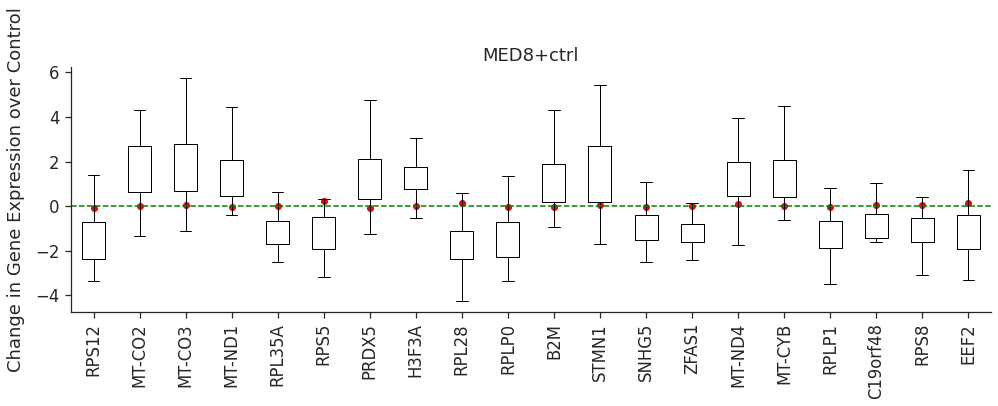

In [ ]:
gears_model.plot_perturbation('MED8+ctrl')

In [ ]:
train_adata = gears_model.set2conditions['train']

In [ ]:
gears_model.set2conditions['train']

['NAF1+ctrl',
 'UBL5+ctrl',
 'TIMM9+ctrl',
 'SMG5+ctrl',
 'MED9+ctrl',
 'RPL3+ctrl',
 'RNF8+ctrl',
 'HNRNPH1+ctrl',
 'SLC35B1+ctrl',
 'LIN54+ctrl',
 'EIF1AX+ctrl',
 'OR7A17+ctrl',
 'NUP98+ctrl',
 'OIP5+ctrl',
 'ANAPC15+ctrl',
 'RRM2+ctrl',
 'N6AMT1+ctrl',
 'WTAP+ctrl',
 'RIOK2+ctrl',
 'CIAO1+ctrl',
 'POP7+ctrl',
 'EIF3E+ctrl',
 'ctrl',
 'MED10+ctrl',
 'TRA2B+ctrl',
 'NAA38+ctrl',
 'CDAN1+ctrl',
 'KLC2+ctrl',
 'CHORDC1+ctrl',
 'PPP4C+ctrl',
 'RAB18+ctrl',
 'TUBGCP2+ctrl',
 'RPL5+ctrl',
 'RPL13+ctrl',
 'ASF1B+ctrl',
 'WDR36+ctrl',
 'RPL31+ctrl',
 'PRODH+ctrl',
 'NBAS+ctrl',
 'ELP5+ctrl',
 'SNX15+ctrl',
 'RPS6+ctrl',
 'SEC13+ctrl',
 'EIF4E+ctrl',
 'H2AFZ+ctrl',
 'EEF1G+ctrl',
 'DNAJA1+ctrl',
 'FBXO5+ctrl',
 'MTOR+ctrl',
 'USP8+ctrl',
 'HTATSF1+ctrl',
 'SUPT5H+ctrl',
 'PPP2R3C+ctrl',
 'EIF4G1+ctrl',
 'RPA1+ctrl',
 'BRF1+ctrl',
 'NUP205+ctrl',
 'PRPF40A+ctrl',
 'HSPA9+ctrl',
 'SLU7+ctrl',
 'DDX46+ctrl',
 'NSUN4+ctrl',
 'POLA1+ctrl',
 'SNRNP40+ctrl',
 'EMC3+ctrl',
 'ERH+ctrl',
 'MRPS7+ctrl',

In [ ]:
df = pd.read_csv('/content/K562_ACOC_Nov2022_test_paired.gene_summary.txt', sep='\t')

In [ ]:
results = []
for gene in inter_49:
  single_list = [gene]
  results.append(gears_model.predict([single_list]))

In [ ]:
results[0]

{'ZFPM2': array([0.7900288 , 0.7817281 , 0.13059406, ..., 0.77995974, 0.41197512,
        0.2858326 ], dtype=float32)}

In [ ]:
import umap
! pip install datashader
import datashader as ds
import pandas as pd
! pip install bokeh
import holoviews as hv
import umap.plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 KB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59437 sha256=6b2c53e31492721e919a440581db6a0cf7586c46e46cd43a40e2cbe97af952df
  Stored in directory: /root/.cache/pip/wheels/42/ef/d7/781cf80d4146d76b3d2ed2510113d78c2643c842cc6c22918d
Successfully built datashape
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Processed_adata = desc.train(Processed_adata, dims=[Processed_adata.shape[1], 32, 16], tol=0.005, n_neighbors=10,
                   batch_size=256, louvain_resolution=[0.8],
                   save_dir="result_pbmc3k", do_tsne=True, learning_rate=300,
                   do_umap=True, num_Cores_tsne=4,
                   save_encoder_weights=True)


Start to process resolution= 0.8
The number of cpu in your computer is 12
Create the directory:result_pbmc3k to save result
Checking whether result_pbmc3k/ae_weights.h5  exists in the directory
The file ae_weights.h5 is not exits
Pretraining the 1th layer...
learning rate = 0.1
Epoch 1/50


TypeError: ignored

In [ ]:
prob_08= Processed_adata.uns["prob_matrix0.8"]
Processed_adata.obs["max.prob0.8"]=np.max(prob_08,axis=1)
#tSNE plot 
sc.pl.scatter(Processed_adata,basis="tsne0.8",color=['desc_0.8',"max.prob0.8",'MS4A1', 'NKG7'])


KeyError: ignored

In [ ]:
x = fit.fit(transcriptomes)

In [ ]:
gears_model.adata.X

<88666x8563 sparse matrix of type '<class 'numpy.float32'>'
	with 759246958 stored elements in Compressed Sparse Row format>

In [ ]:
l = train_adata
Processed_adata = adata_copy[:, adata_copy.var.gene_name.isin(l)]

In [ ]:
Processed_adata

View of AnnData object with n_obs × n_vars = 89693 × 0
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'

In [ ]:
for i in range(len(train_adata)):
    train_adata[i] = train_adata[i].replace("+", "")

print(train_adata)

['NAF1', 'UBL5', 'TIMM9', 'SMG5', 'MED9', 'RPL3', 'RNF8', 'HNRNPH1', 'SLC35B1', 'LIN54', 'EIF1AX', 'OR7A17', 'NUP98', 'OIP5', 'ANAPC15', 'RRM2', 'N6AMT1', 'WTAP', 'RIOK2', 'CIAO1', 'POP7', 'EIF3E', '', 'MED10', 'TRA2B', 'NAA38', 'CDAN1', 'KLC2', 'CHORDC1', 'PPP4C', 'RAB18', 'TUBGCP2', 'RPL5', 'RPL13', 'ASF1B', 'WDR36', 'RPL31', 'PRODH', 'NBAS', 'ELP5', 'SNX15', 'RPS6', 'SEC13', 'EIF4E', 'H2AFZ', 'EEF1G', 'DNAJA1', 'FBXO5', 'MTOR', 'USP8', 'HTATSF1', 'SUPT5H', 'PPP2R3C', 'EIF4G1', 'RPA1', 'BRF1', 'NUP205', 'PRPF40A', 'HSPA9', 'SLU7', 'DDX46', 'NSUN4', 'POLA1', 'SNRNP40', 'EMC3', 'ERH', 'MRPS7', 'CENPJ', 'MRPS28', 'SLC7A5', 'U2SURP', 'FAM136A', 'KDM8', 'C1QBP', 'DNLZ', 'PMPCB', 'BTF3', 'PGD', 'SNRNP200', 'BCAS2', 'CACNB3', 'RAD51', 'SLC39A9', 'SLC1A5', 'URB1', 'FXN', 'PCF11', 'SAE1', 'SERBP1', 'ABCB7', 'RPS26', 'MAK16', 'GRPEL1', 'COX7B', 'VPS37A', 'LAMTOR4', 'RSL1D1', 'ACTL6A', 'NUF2', 'NIP7', 'CDK9', 'SAMM50', 'SRBD1', 'CBLN1', 'MFAP1', 'ALG2', 'PSMC2', 'CSE1L', 'USF2', 'ACTR2', 'RNF14

In [ ]:
X.obs['n_counts'] = X.X.sum(axis=1).A1


In [ ]:
sc.pl.violin(X, ['n_counts'],jitter=0.4, multi_panel=True)

NameError: ignored